In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col='id', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', index_col='id', encoding="ISO-8859-1")

products_description = pd.read_csv('./data/product_descriptions.csv')

In [3]:
# merge with product description

train = pd.merge(train, products_description, how='left', on='product_uid')
test = pd.merge(test, products_description, how='left', on='product_uid')

In [4]:
# load product attributes

attributes = pd.read_csv('./data/attributes.csv')
attributes = attributes.fillna('')

In [5]:
# merge attributes
def merge_attributes(attributes):
    return ' '.join(attributes)

attributes_grouped_by_uid = attributes.groupby('product_uid')['value'].apply(merge_attributes)

In [6]:
attributes_df = pd.DataFrame(attributes_grouped_by_uid)
attributes_df['product_uid'] = attributes_df.index

In [7]:
train_with_attributes = pd.merge(train, attributes_df, how='left', on='product_uid')
test_with_attributes = pd.merge(test, attributes_df, how='left', on='product_uid')

In [8]:
train_with_attributes = train_with_attributes.fillna('')
test_with_attributes = test_with_attributes.fillna('')

In [9]:
train.head()

,product_uid,product_title,search_term,relevance,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


In [10]:
test.head()

,product_uid,product_title,search_term,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,"Not only do angles make joints stronger, they ..."
2,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,"Not only do angles make joints stronger, they ..."
3,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties,"Not only do angles make joints stronger, they ..."
4,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668,"Not only do angles make joints stronger, they ..."


In [8]:
train_with_attributes.head()

,product_uid,product_title,search_term,relevance,product_description,value
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev..."
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,Combo Tub and Shower No Includes the trim kit ...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,Combo Tub and Shower No Includes the trim kit ...


In [9]:
test_with_attributes.head()

,product_uid,product_title,search_term,product_description,value
0,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...
1,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...
2,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...
3,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...
4,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668,"Not only do angles make joints stronger, they ...",Versatile connector for various 90° connection...


In [11]:
y = train.relevance

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=44)

In [14]:
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(51846, 5) (22221, 5) (51846L,) (22221L,)


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveRegressor, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb

In [22]:
%run scripts/features.py

In [33]:
ft = FeatureTransformer()
# scaler = MinMaxScaler()
# est = PassiveAggressiveRegressor(C=0.01)
# est = SGDRegressor(penalty='l1')
# rf = RandomForestRegressor(n_estimators=25, random_state=0)
# est = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
est = xgb.XGBRegressor()

online_model_pipe = Pipeline([('ft', ft), ('est', est)])

online_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ft', FeatureTransformer()), ('est', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

In [28]:
from sklearn.metrics import mean_squared_error

In [34]:
predsTrain = online_model_pipe.predict(X_train)
predsTest = online_model_pipe.predict(X_test)

In [32]:
print 'RMSE on the training set %f ' %(np.sqrt(mean_squared_error(y_train, predsTrain)))
print 'RMSE on the test set %f ' %(np.sqrt(mean_squared_error(y_test, predsTest)))

RMSE on the training set 0.487052 
RMSE on the test set 0.481149 


In [63]:
# fit on the entire training dataset
online_model_pipe.fit(train_with_attributes, y)

Pipeline(steps=[('ft', FeatureTransformer()), ('est', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.75,
       gamma=0.75, learning_rate=0.475, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=44, silent=True, subsample=0.55))])

In [64]:
predictions = online_model_pipe.predict(test_with_attributes)

In [65]:
def scale_predictions(prediction):
    if prediction > 3.0:
        return 3.0
    elif prediction < 1.0:
        return 1.0
    else:
        return prediction

In [66]:
predictions = map(scale_predictions, predictions)

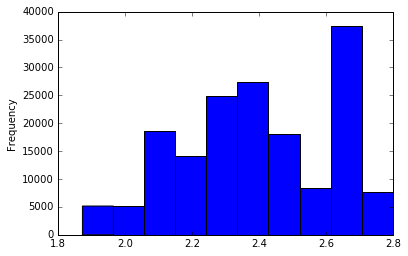

In [67]:
pd.Series(predictions).plot(kind='hist')

In [68]:
# prepare submission file
submission = pd.read_csv('./data/sample_submission.csv')
submission['relevance'] = predictions
submission.to_csv('./submissions/tenth.csv', index=False)